In [1]:
getwd()

[1] "C:/Users/rpgen/Documents/CS424/project3/bigYellowTaxi"

In [9]:
library(ggplot2)
library(ggmap)
library(maps)
library(mapdata)
library(ggthemes)
library(sp)
library(stringr)
library(plyr)

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.


Attaching package: 'plyr'


The following object is masked from 'package:maps':

    ozone




In [2]:
#READ CSV FILE AND CONVERT TO ONE DATA FRAME
col_name <- c("","Trip.Start.Timestamp","Trip.Seconds","Trip.Miles","Pickup.Community.Area","Dropoff.Community.Area","Company")
setwd("/Users/rpgen/Documents/CS424/project3/bigYellowTaxi/Data")
myfiles <- list.files(pattern="*.csv", full.names=TRUE)
myfiles
data <- do.call(rbind, lapply(myfiles, read.csv, header = FALSE))
colnames(data) <- col_name



[1] "./modified_taxi_partaa.csv" "./modified_taxi_partab.csv"
 [3] "./modified_taxi_partac.csv" "./modified_taxi_partad.csv"
 [5] "./modified_taxi_partae.csv" "./modified_taxi_partaf.csv"
 [7] "./modified_taxi_partag.csv" "./modified_taxi_partah.csv"
 [9] "./modified_taxi_partai.csv" "./modified_taxi_partaj.csv"
[11] "./modified_taxi_partak.csv" "./modified_taxi_partal.csv"
[13] "./modified_taxi_partam.csv" "./modified_taxi_partan.csv"
[15] "./modified_taxi_partao.csv" "./modified_taxi_partap.csv"
[17] "./modified_taxi_partaq.csv"

In [3]:
data

,Trip.Start.Timestamp,Trip.Seconds,Trip.Miles,Pickup.Community.Area,Dropoff.Community.Area,Company
<int>,<chr>,<int>,<dbl>,<int>,<int>,<chr>
19,01/01/2019 12:00:00 AM,1260,0.6,77,28,Blue Ribbon Taxi Association Inc.
21,01/01/2019 12:00:00 AM,360,0.8,8,8,Taxi Affiliation Services
23,01/01/2019 12:00:00 AM,360,1.0,8,8,Taxi Affiliation Services
24,01/01/2019 12:00:00 AM,420,0.8,8,8,"Taxicab Insurance Agency, LLC"
25,01/01/2019 12:00:00 AM,180,0.7,77,4,Taxi Affiliation Services
26,01/01/2019 12:00:00 AM,960,0.6,28,32,Taxi Affiliation Services
29,01/01/2019 12:00:00 AM,540,1.0,32,8,Choice Taxi Association
32,01/01/2019 12:00:00 AM,1800,3.2,32,8,Star North Management LLC
33,01/01/2019 12:00:00 AM,1560,14.3,76,8,Top Cab Affiliation


In [4]:
sort(unique(data$Pickup.Community.Area))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[76] 76 77

In [5]:
sort(unique(data$Dropoff.Community.Area))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[76] 76 77

In [6]:
sort(unique(data$Company))

[1] "1085 - 72312 N and W Cab Co"                 
 [2] "1469 - 64126 Omar Jada"                      
 [3] "2092 - 61288 Sbeih company"                  
 [4] "24 Seven Taxi"                               
 [5] "2733 - 74600 Benny Jona"                     
 [6] "3011 - 66308 JBL Cab Inc."                   
 [7] "3094 - 24059 G.L.B. Cab Co"                  
 [8] "312 Medallion Management Corp"               
 [9] "3556 - 36214 RC Andrews Cab"                 
[10] "3591 - 63480 Chuks Cab"                      
[11] "3620 - 52292 David K. Cab Corp."             
[12] "3623 - 72222 Arrington Enterprises"          
[13] "3721 - Santamaria Express, Alvaro Santamaria"
[14] "4053 - 40193 Adwar H. Nikola"                
[15] "4623 - 27290 Jay Kim"                        
[16] "5 Star Taxi"                                 
[17] "5006 - 39261 Salifu Bawa"                    
[18] "5062 - 34841 Sam Mestas"                     
[19] "5074 - 54002 Ahzmi Inc"                      
[20] "5874 - 73628 Sergey Cab Corp."               
[21] "6574 - Babylon Express Inc."                 
[22] "6742 - 83735 Tasha ride inc"                 
[23] "6743 - 78771 Luhak Corp"                     
[24] "American United"                             
[25] "American United Taxi Affiliation"            
[26] "Blue Diamond"                                
[27] "Blue Ribbon Taxi Association Inc."           
[28] "Checker Taxi"                                
[29] "Checker Taxi Affiliation"                    
[30] "Chicago Carriage Cab Corp"                   
[31] "Chicago Independents"                        
[32] "Chicago Medallion Management"                
[33] "Chicago Star Taxicab"                        
[34] "Chicago Taxicab"                             
[35] "Choice Taxi Association"                     
[36] "City Service"                                
[37] "Flash Cab"                                   
[38] "Globe Taxi"                                  
[39] "Gold Coast Taxi"                             
[40] "KOAM Taxi Association"                       
[41] "Leonard Cab Co"                              
[42] "Medallion Leasin"                            
[43] "Metro Jet Taxi A"                            
[44] "Nova Taxi Affiliation Llc"                   
[45] "Patriot Taxi Dba Peace Taxi Associat"        
[46] "Petani Cab Corp"                             
[47] "Setare Inc"                                  
[48] "Star North Management LLC"                   
[49] "Sun Taxi"                                    
[50] "Taxi Affiliation Service Yellow"             
[51] "Taxi Affiliation Services"                   
[52] "Taxicab Insurance Agency, LLC"               
[53] "Top Cab Affiliation"                         
[54] "U Taxicab"                                   
[55] "Yellow Cab"

Warning message in eval_tidy(x[[2]], data, env):
"restarting interrupted promise evaluation"


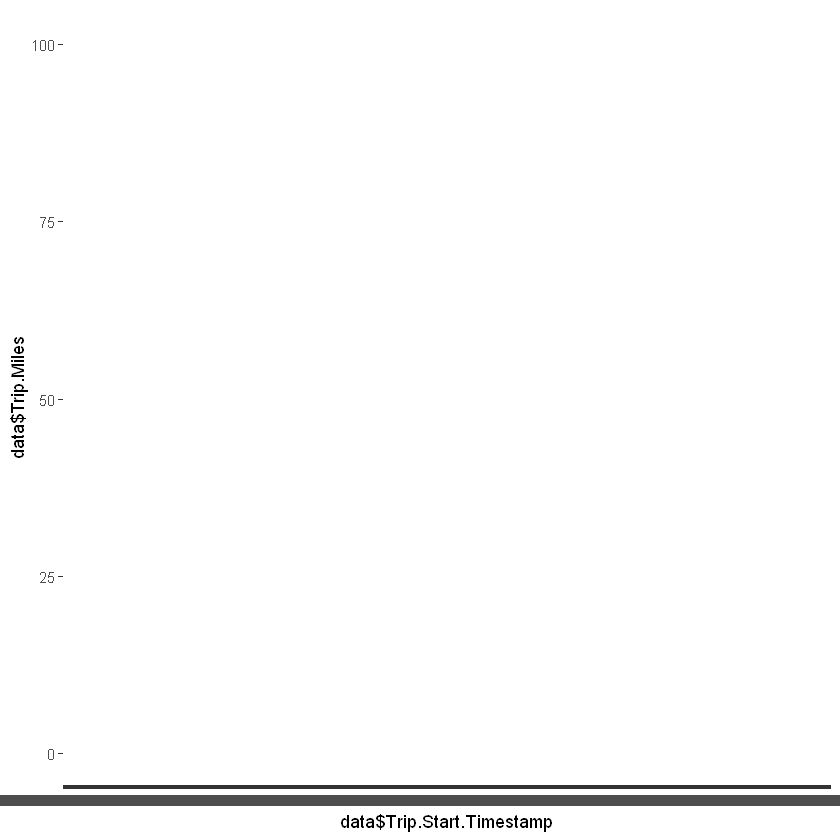

In [11]:
ggplot(data, aes(x=data$Trip.Start.Timestamp, y=data$Trip.Miles))